#Importing the required Libraries and Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#Dataset Description
The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

#Attribute Information:

Sepal_length in cm
Sepal_width in cm
Petal_length in cm
Petal_width in cm 

Iris flower can be divided into 3 species as per the length and width of their Sepals and Petals:

1) Iris Setosa
2) Iris Versicolour
3) Iris Virginica

#Loading the dataset
importing the dataset using pandas read_csv command

In [ ]:
df = pd.read_csv("D:\INTERNSHIP\DATASCIEENCE\IRIS.csv")

#Data Preprocessing


In [ ]:
df.head()   

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape   #Shape of dataset

(150, 5)

In [ ]:
df.columns    #dataset columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.info()    #dataset summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()   #Dataset Statistical Summary

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.isnull().sum()   #Checking Null Values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df['species'].value_counts()   # To display no. of samples on each class.

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

<AxesSubplot:ylabel='species'>

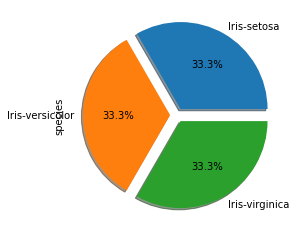

In [ ]:
#Pie plot to show the overall types of Iris classifications
df['species'].value_counts().plot(kind = 'pie',  autopct = '%1.1f%%', shadow = True, explode = [0.08,0.08,0.08])

#Correlation Matrix

In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Heat Map

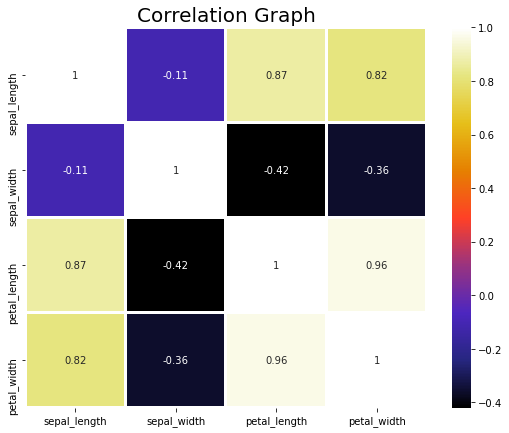

In [ ]:
plt.figure(figsize=(9,7))
sns.heatmap(df.corr(),cmap='CMRmap',annot=True,linewidths=2)
plt.title("Correlation Graph",size=20)
plt.show()

The diagonal values are 1, as predicted, because they reflect the feature's relationship to itself. Petal breadth has a strong positive association with Sepal length and Petal length. In addition, there is a strong positive link between Petal and Sepal length.

#Label encoding for categorical variables 


We frequently work with datasets in machine learning that include numerous labels in one or more columns. Labels in the form of words or numbers can be used. Label encoding is the process of turning labels into numeric form so that they may be read by machines.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['species'] = le.fit_transform(df['species'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df['species'].unique()   # To display no. of samples on each class.

array([0, 1, 2])

#Splitting X and Y into Train and Test dataset

In [ ]:
from sklearn.model_selection import train_test_split

features = ['sepal_length','sepal_width','petal_length','petal_width']
X = df.loc[:, features].values   #defining the feature matrix
Y = df.species

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 40,random_state=0)

In [ ]:
X_Train.shape


(110, 4)

In [ ]:
X_Test.shape

(40, 4)

In [ ]:
Y_Train.shape


(110,)

In [ ]:
Y_Test.shape

(40,)

#Data Scaling

In [ ]:
# Feature Scaling to bring all the variables in a single scale.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Train = sc.fit_transform(X_Train)
X_Test = sc.transform(X_Test)


# Importing some metrics for evaluating  models.
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import  classification_report
from sklearn.metrics import confusion_matrix

#Model Creation

#Logistic Regression **bold text**

In [ ]:
#Model Creation
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log_model= LogisticRegression(random_state = 0)
log_model.fit(X_Train, Y_Train)

# model training
log_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_log_res=log_model.predict(X_Test)

In [ ]:
Y_Pred_Test_log_res

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_Test_log_res)*100)

Accuracy: 97.5


In [ ]:
print(classification_report(Y_Test, Y_Pred_Test_log_res))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [ ]:
confusion_matrix(Y_Test,Y_Pred_Test_log_res )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

#K-Nearest Neighbour

In [ ]:
# Importing KNeighborsClassifier from sklearn.neighbors library
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto')

# Importing KNeighborsClassifier 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)

# model training
knn_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_knn=knn_model.predict(X_Test)

In [ ]:
log_model.fit(X_Train, Y_Train)

LogisticRegression(random_state=0)

In [ ]:
Y_Pred_Test_knn

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Pred_Test_knn)*100)

Accuracy: 97.5


In [ ]:
print(classification_report(Y_Test,Y_Pred_Test_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [ ]:
confusion_matrix(Y_Test, Y_Pred_Test_knn)

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

#Naive Bayes

In [ ]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
nav_byes = GaussianNB()

# model training
nav_byes.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_nvb=nav_byes.predict(X_Test)

In [ ]:
Y_Pred_Test_nvb

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_Test, Y_Pred_Test_nvb)*100)

Accuracy: 100.0


In [ ]:
print(classification_report(Y_Test, Y_Pred_Test_nvb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00         9

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [ ]:
confusion_matrix(Y_Test,Y_Pred_Test_nvb )

array([[13,  0,  0],
       [ 0, 18,  0],
       [ 0,  0,  9]], dtype=int64)

#Random Forest Classification

In [ ]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
Ran_for = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')

# model training
Ran_for.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_rf=Ran_for.predict(X_Test)


In [ ]:
Y_Pred_Test_rf

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Pred_Test_rf)*100)

Accuracy: 97.5


In [ ]:
print(classification_report(Y_Test, Y_Pred_Test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [ ]:
confusion_matrix(Y_Test,Y_Pred_Test_rf )


array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

#SVM

In [ ]:
# Importing SVC from sklearn.svm library

from sklearn.svm import SVC
svm_model=SVC(C=500, kernel='rbf')

# model training
svm_model.fit(X_Train, Y_Train)

# Predicting
Y_Pred_Test_svm=svm_model.predict(X_Test)

In [ ]:
Y_Pred_Test_svm

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1])

In [ ]:
print("Accuracy:",metrics.accuracy_score(Y_Test,Y_Pred_Test_svm)*100)

Accuracy: 97.5


In [ ]:
print(classification_report(Y_Test, Y_Pred_Test_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        18
           2       0.90      1.00      0.95         9

    accuracy                           0.97        40
   macro avg       0.97      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40



In [ ]:
confusion_matrix(Y_Test,Y_Pred_Test_svm )

array([[13,  0,  0],
       [ 0, 17,  1],
       [ 0,  0,  9]], dtype=int64)

#Model Evaluation Results

In [ ]:
print("MODEL EVALUATION RESULTS")
print("Accuracy of KNN Model:",metrics.accuracy_score(Y_Test,Y_Pred_Test_knn)*100)
print("Accuracy of Logistic Regression Model:",metrics.accuracy_score(Y_Test, Y_Pred_Test_log_res)*100)
print("Accuracy of Naive Bayes Model:",metrics.accuracy_score(Y_Test, Y_Pred_Test_nvb)*100)
print("Accuracy of SVM Model:",metrics.accuracy_score(Y_Test,Y_Pred_Test_svm)*100)
print("Accuracy of Random Forest Classification Model:",metrics.accuracy_score(Y_Test,Y_Pred_Test_rf)*100)

MODEL EVALUATION RESULTS
Accuracy of KNN Model: 97.5
Accuracy of Logistic Regression Model: 97.5
Accuracy of Naive Bayes Model: 100.0
Accuracy of SVM Model: 97.5
Accuracy of Random Forest Classification Model: 97.5


#Conclusions

Our dataset was rather small, with only 150 rows and homogeneous distribution of all three species.
Petal_widthcm and petal_lengthcm were substantially associated.
Petal_lengthcm and petal_widthcm were substantially associated.

On the Iris Test data set, I used 6 different machine learning classification models to identify the flower into its three species:

a) Iris Setosa 

b) Iris Versicolor 

c) Iris Virginica 

Depends on the length and width of the Petals and Sepals of the flower
Due to the tiny size of the dataset, we received very high accuracy scores for all of the models, including a score of 100 for KNN and SVM with Linear Kernel models with little hyper parameter adjustment.

